# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `numba` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

# Question 1 (30 points)

![](points-on-line.png)

1. We monitor server faults in a data center over a period of T units of time and represents each occurring fault as a point on the line. What is the probability that k faults take place between $t_1$ and $t_2$ if $n$ total points were recorded ?  (10 points)

2. We collected a very large set of faults $n \rightarrow \infty$ over a long measurement interval $T \rightarrow \infty$  and we observed that on average faults occur with a rate of $\lambda = \frac{n}{T}$.   This [allows us](https://en.wikipedia.org/wiki/Poisson_limit_theorem) to model the probability of $k_a$ points in an interval $t_a$ as [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution).  
    Suppose that we measure $k_a$ and $k_b$ faults in two consecutive intervals of durations $t_a=(t_1, t_2)$ and $t_b=(t_2, t_3)$ respectively where $t_a+t_b < T$, write the expression of the joint probability $p(k_a \in t_a, k_b \in t_b)$. (10 points)

3. Suppose now that we need to schedule personnel to replace these servers and we are interested to use the fault data to estimate the probability of $p(k_a \in t_a | k_c \in t_c)$ where $t_c=t_a + t_b$. Write the expression of this conditional probability.  (10 points)

`Write your answer here and use Latex math notation for math. If you prefer write the math with pencil and scan the writeup in a png image that you can insert here using` 

```
![](your-png-file.png)
```

## Question 2 (10 points)

Generate N uniform distributed over the interval [0,1] random variables $\{x_1, \dots x_N\}$. 

Compute their mean and after repeating such computation $m$ times, plot the  histogram as $N$ takes values ${1, 5, 10, 20}$. 

Provide a justification of the resultant histogram by reading about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). 

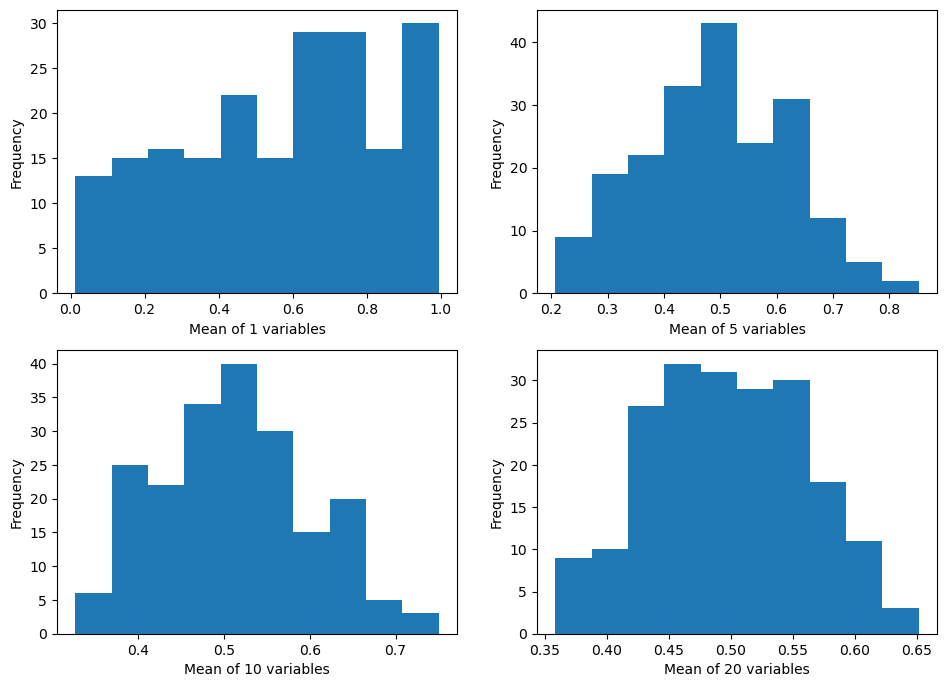

In [37]:
# Type the Python code here
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

rand_var = list()

N = [1,5,10,20]
M = 200
mean = np.ndarray(shape=(len(N),M))

for i in range(0,len(N)):
    tmp = np.random.rand(200,N[i])
    mean[i,:]= np.mean(tmp,axis=1)
    rand_var.append(tmp)
    
for i in range(0,len(N)):
    plt.subplot(2,2,i+1,xlabel=f"Mean of {N[i]} variables",ylabel="Frequency")
    plt.hist(mean[i,:])

plt.subplots_adjust(bottom=0.2,right=1.5,top=1.5)

## Question 2 (10 points) 

The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf). 

Simulate and plot the bivariate normal distribution with the shown parameters. 

You need to use the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 

0.004270379199172737


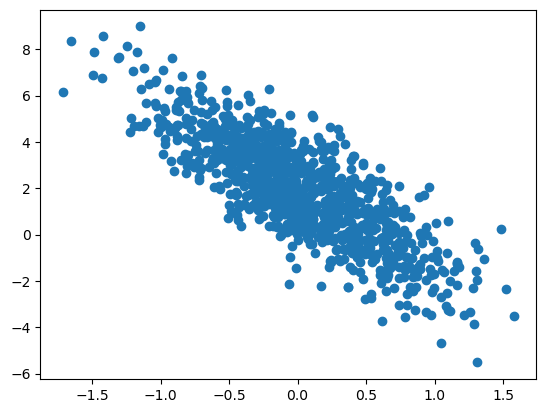

In [2]:
num_samples = 1000

mean = np.array([0,2])
cov = np.array([[0.3,-1],[-1,5]])

sigma = np.linalg.cholesky(cov)

x = np.random.normal(0,1,num_samples)
y = np.random.normal(0,1,num_samples)

# x = np.array([np.random.normal(0,1) for _ in range(num_samples)])
# y = np.array([np.random.normal(0,1) for _ in range(num_samples)])
res = np.array([x,y]).T.dot(sigma.T) + mean

plt.scatter(res[:,0],res[:,1])

print(np.mean(res[:,0]))

## Question 3 (25 points)

The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf). 

1. Simulate for $m=10, 100, 1000$ samples and plot the conditional distribution as given by the analytical expressions of the conditional mean and covariance matrix in Python. (5 points)
   
2. Use maximum likelihood estimation (MLE) with Stochastic Gradient Descent (SGD) to estimate the parameters of resultant distribution. (15 points)

3. Plot the estimates as a function of $m$ - include the analytical mean and variance in the plots for comparison.  (5 points)

You may use [these](http://jrmeyer.github.io/machinelearning/2017/08/18/mle.html) derivatives for implementing the SGD-based estimator. 



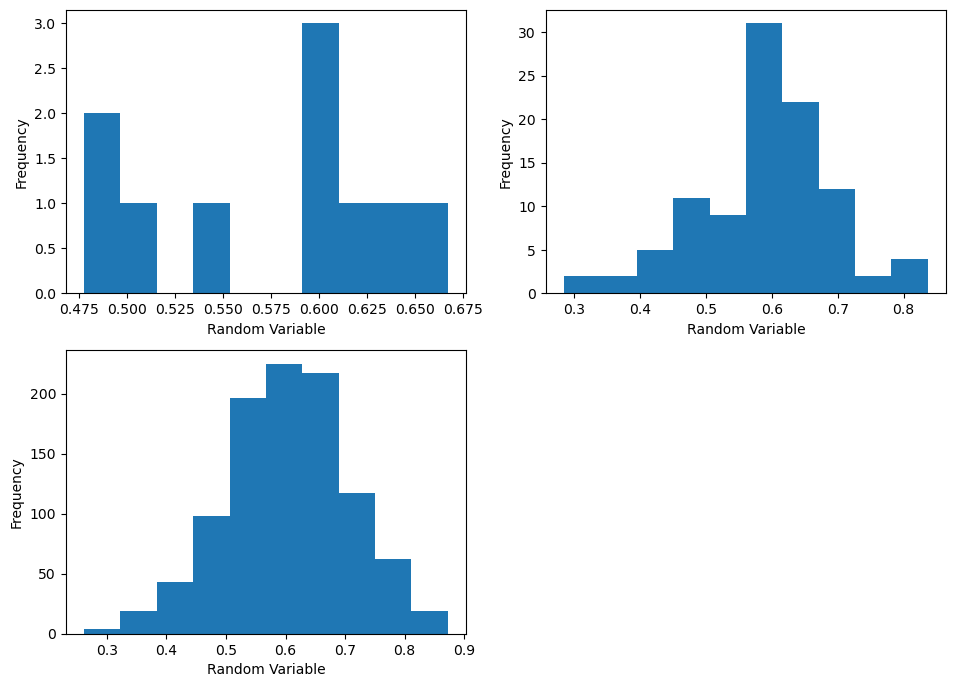

In [38]:
# Type the Python code here
m = [10,100,1000]

# Given normal distribution
samples = [np.random.normal(0.6,0.1,m[0]),
          np.random.normal(0.6,0.1,m[1]),
          np.random.normal(0.6,0.1,m[2])]

# plt.subplot(2,1)

for i in range(0,len(samples)):
    plt.subplot(2,2,i+1,xlabel='Random Variable',ylabel='Frequency')
    plt.hist(samples[i])

plt.subplots_adjust(bottom=0.2,right=1.5,top=1.5)

In [40]:
import math 
def train(X,W,lr,epoch,BATCH_SIZE):
    def grad_desc(X,W,lr):
        
        # Grad_0 represent the mean 
        #Grad_1 represent the std deviation (sigma)
        grad_0 = (np.sum(X-W[0]))/(W[1]*W[1])
        grad_1 = ((np.sum((X-W[0])**2)/(W[1]*W[1])) - len(X))/(W[1])
        
        grad = np.array([grad_0,grad_1])
        
        # As we are taking maximum likelihood as loss
        # Therefore we needed to maximize maximum likelihood and loss 
        # Therefore minimize -ve of max likelihood
        # Therefore sum instead of subtraction
        W = W + np.multiply(lr,grad)
        return W,grad
    
    def metric(X,W):
        mean = np.mean(X)
        var = np.sum((X-mean)**2)/len(X)
        print(f'Mean is {mean} and found {W[0]}')
        print(f'Variance is {var} and found {W[1]**2}')
    
    grad = np.ndarray((epoch,2))
#     W_debug = np.ndarray((epoch,2))
    for i in range(0,epoch):
            for j in range(0,math.floor(float(len(X)/BATCH_SIZE))):
                W,grad[i,:] = grad_desc(X[np.random.choice(len(X),size=BATCH_SIZE,replace=False)],W,lr)
#                 W_debug[i,:] = W
    metric(X,W)

#     return grad,W_debug
    return W

In [41]:
W_samples = np.ndarray((len(samples),2))

for i in range(0,len(samples)):
    W_samples[i,:] = train(samples[i],[1,1],[1e-5,1e-5],1000,8)

# grad,W = train(samples[2],[1,1],np.array([1e-6,1e-6]),10000,32)
# # plt.plot(range(0,grad.shape[0]),grad[:,0])
# plt.plot(range(0,grad.shape[0]),(grad[:20,1]))

Mean is 0.5739989445323375 and found 0.9650129694542987
Variance is 0.004082751430022109 and found 0.8692795080623514
Mean is 0.5908032087447096 and found 0.5898303569394593
Variance is 0.010444757044727016 and found 0.010531798312058447
Mean is 0.6035727093452895 and found 0.6043441405085392
Variance is 0.01072379877770258 and found 0.010849966003077522


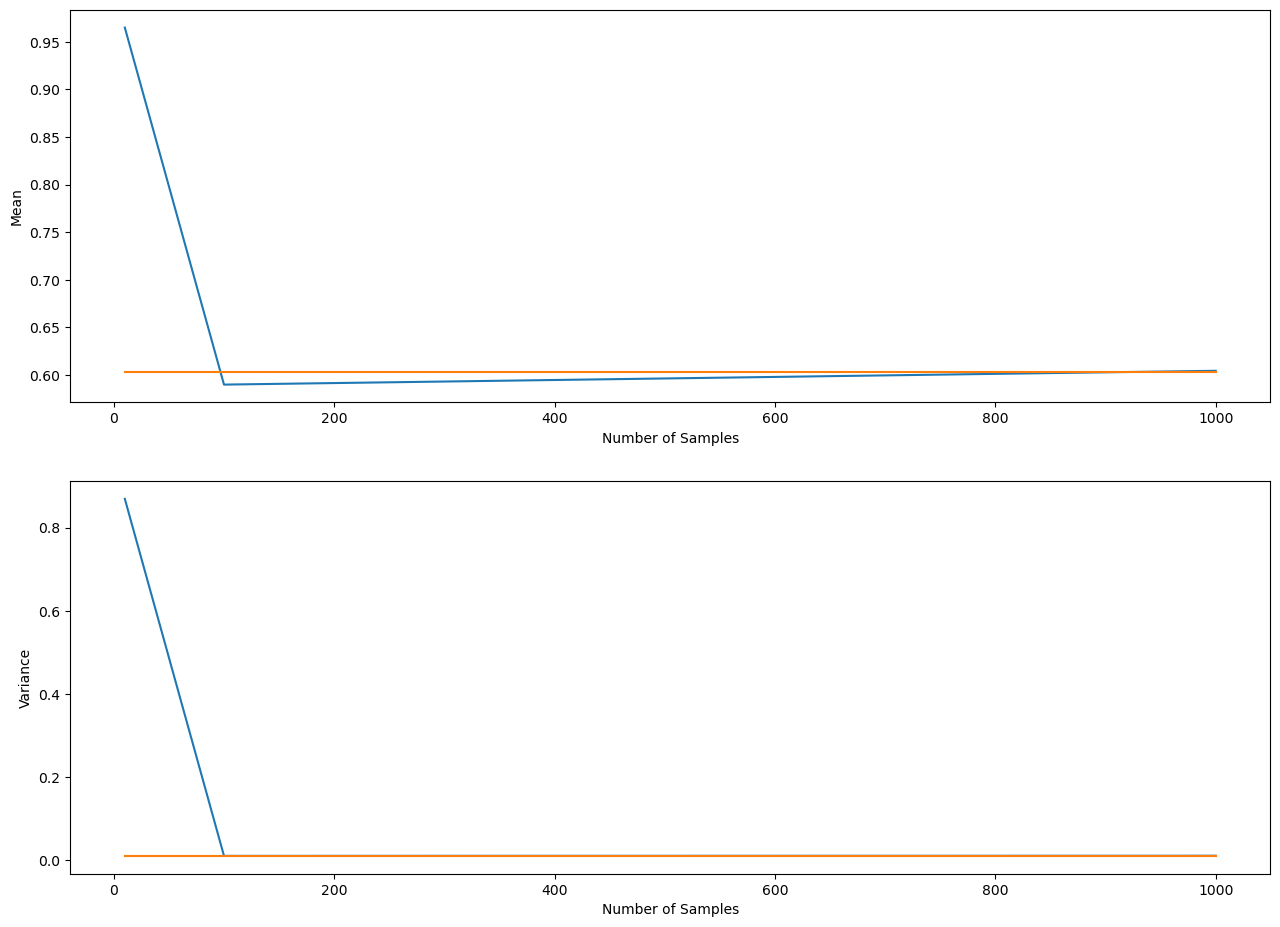

In [42]:
plt.subplot(2,1,1,xlabel='Number of Samples',ylabel='Mean')
plt.plot(m,W_samples[:,0])
mean = []
for j in range(0,len(m)):
    mean.append(np.mean(samples[i]))
plt.plot(m,mean)
plt.subplot(2,1,2,xlabel='Number of Samples',ylabel='Variance')
plt.plot(m,W_samples[:,1]**2)
var = []
for j in range(0,len(m)):
    var.append(np.var(samples[i]))
plt.plot(m,var)

plt.subplots_adjust(bottom=0.2,right=2,top=2)

## Question 4 (25 points)

![](mic-array.png)

You smartphone has an microphone array i.e. a number of sensors that are spatially separated in the circumference of the device. The array is used to do interference suppression and it does so by beaming to the direction of your voice suppressing background noises. To do so it needs to measure the spatial correlation matrix. 

The data (sound in this case) are assumed to arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$. 

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively (15 points). 
3. Simulate $m=50$ samples assuming a correlation matrix of your choice. Plot the elements of the estimated correlation elements (row, column) of the correlation matrix as they estimated recursively over time assuming $n=2, 4 and 8$ sensors (mics). Comment if and if so how the estimated element variance is affected by the ratio $n/m$. (5 points)

In [ ]:
# Type the python code here

